In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x104aa7bd0>)

In [4]:
%pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Analysis and visualization

Exploring the data by visualizing the distribution of values in some columns of the data set.
And relationship between charges and other columns.

Using Matplotlib, Seaborn,Plotly for visualization.

In [10]:
%pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age
Age is numerical number. Min age 18 and max is 64. We can visulize the distribution of age using histogram with 47 bins(one for each year age) and a box plot. Using plotly to make chart interactive.

In [13]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
fig = px.histogram(medical_df,
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution age in the dataset is almost uniform, with 20-30 customers at every age, except for 18 and 19, which seems to have twice no.of customers as others.

### Body Mass Index
Lets look at the distribution of BMI of customers using histogram and box plot.

In [15]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of BMI seems to form a gaussian distribution centered around the value 30.
And there are few outliers towards the right.

### Charges
Lets visualize the distribution of charges. Anual medical charges for customers. This is the column we are trying to predict. Lets also use categorical column 'smoker' to distinguish the chrges for smokers and non-smokers.

In [16]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   marginal='box',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

By the about chart we acn observe people who responded no for smokr having lower medical charges under or around 10k
And people responded yes havinging higher medical charges.

There is a significant diferences in medical expenses between smoker and non-smokers.
median of 7300$ and 35000$.

Optional:
visualising the distribution of medical charges in connection with sex and region.

In [17]:
# visualising with sex
fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   marginal='box',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
# visualising with sex
fig = px.histogram(medical_df,
                   x='charges',
                   color='region',
                   
                   marginal='box',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker
Lets visualize the distribution of smoker.

In [19]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
px.histogram(medical_df,
             x='smoker',
             color='sex',
             title='Smoker')

Around 20% of the population are reported that they smoke. It appears that males have the more smoking habbit. 

### Age and charges
Lets visualize the relationship between the 'age' and 'charges' using scatter plot. Each point in the scatter plot represent a customer. And also we will use values of 'smoker' column to color the points.

In [21]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

By observing the above chart we can say:

* In general medical charges increases wit the age. There is a significant variation in that. Age alone cannot be determine the medical charges.

* We can see 3 cluster of points.

1. 1st one have the largest cluster of 'healthy non-smokers' who have relatively low medical charges compared to others.
2. 2nd cluster contains mix of smokers and non-smokers. It is possible there might be overlaping between the clisyers. Like 'non smokers with medical issues' and 'smokers with out any medical issues'.
3. 3rd cluster contain smokers where there might be cases like 'smokers with medical issues' and 'heavy smokers'.

### BMI and Charges

In [22]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data='sex',
                 title='BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

By observing the above chart we can say:

* BMI is not effecting the medical charges of the people. but smoking habit is effecting the medical charges.
* But Smokers who have greater than BMI 30 are having more medical charges.

In [23]:
px.violin(medical_df, x='children', y='charges')

### Corelation
From the observation we can see that values in some columns are more closly related to the values in 'charges'.
eg: 'age' and 'charges' seems to grow together where 'bmi' and 'charges' dont.

These relationship can be expressed numerically using measure called correlation coefficient.
Computed using .corr method.

In [24]:
corr_age=(medical_df.charges.corr(medical_df.age))
corr_bmi=(medical_df.charges.corr(medical_df.bmi))
corr_child=(medical_df.charges.corr(medical_df.children))
print(corr_age, corr_bmi, corr_child)

0.2990081933306478 0.19834096883362887 0.06799822684790487


To compute correlation for categorical columns, they must first convert to numerical columns.

In [25]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
corr_smoker = medical_df.charges.corr(smoker_numeric)
print(corr_smoker)

0.7872514304984778


In [27]:
medical_df_corr = medical_df.select_dtypes(include='number').corr()
print(medical_df_corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

Text(0.5, 1.0, 'Correlation Matrix')

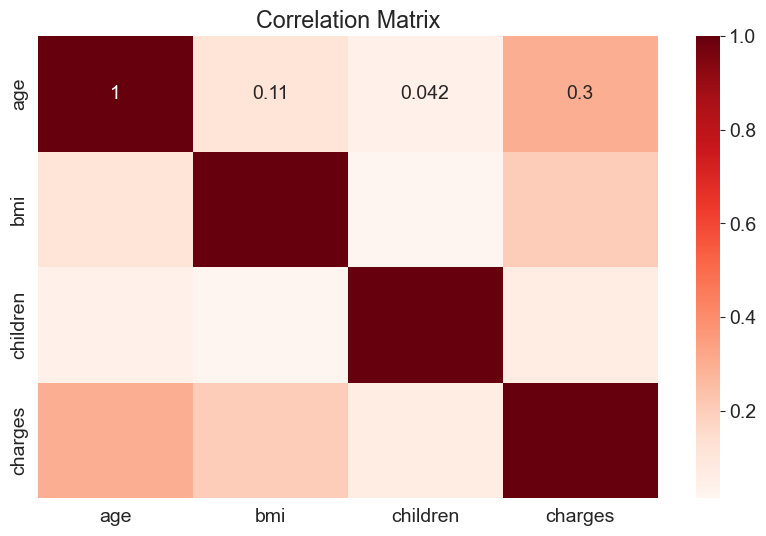

In [28]:
sns.heatmap(medical_df_corr, cmap='Reds', annot=True)
plt.title('Correlation Matrix')

### Linear Regression Using a Single Feature
We know that there is a strong correlation between age and smoker with charges. Lets try to find a way to estimating the value of charges using the value of "age" for non smoker. First lets create a data frame containing just the data for non smokerts.


In [29]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Visulaize the relationship between age and charges

<Axes: title={'center': 'Age VS Charges'}, xlabel='age', ylabel='charges'>

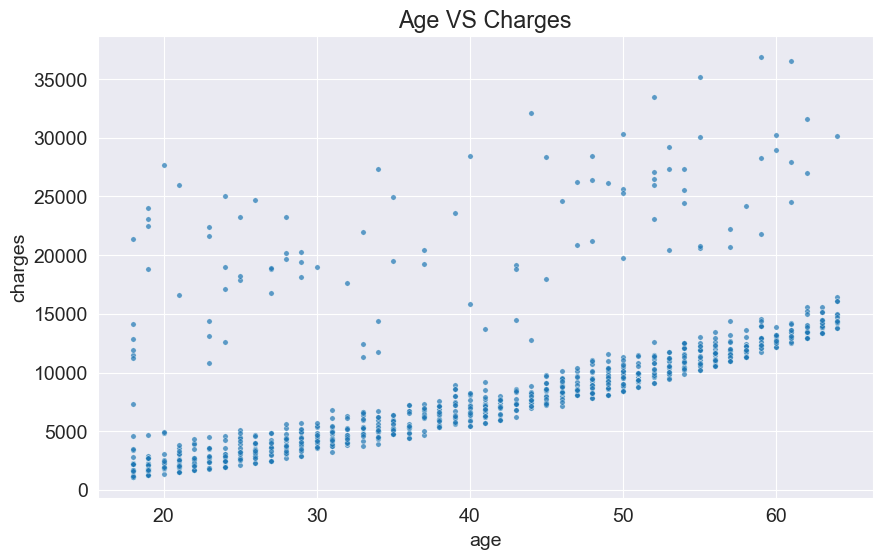

In [30]:
plt.title('Age VS Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Let define a helper function estimate_charges, to compute charges, given age, w and b

In [31]:
def estimate_charges(age, w, b):
    return w * age + b

The estimate_charges function is our very first model.
Let's guess the values for w and b and use them to estimate the value for charges.

In [32]:
w = 50
b = 100

In [33]:
estimate_charges(50, w, b)

2600

By using above parameters my line is going below the points.

In [34]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [35]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [36]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

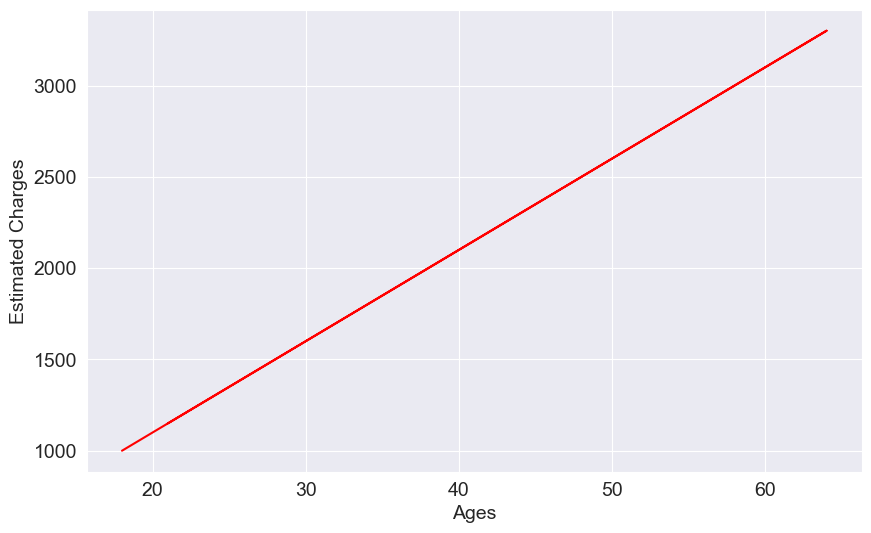

In [37]:
plt.plot(ages, estimated_charges, 'r');
plt.xlabel('Ages');
plt.ylabel('Estimated Charges');

As Expected the points lie on the straight line.

We can overlay this line on the actual data to see how well our model fits the data

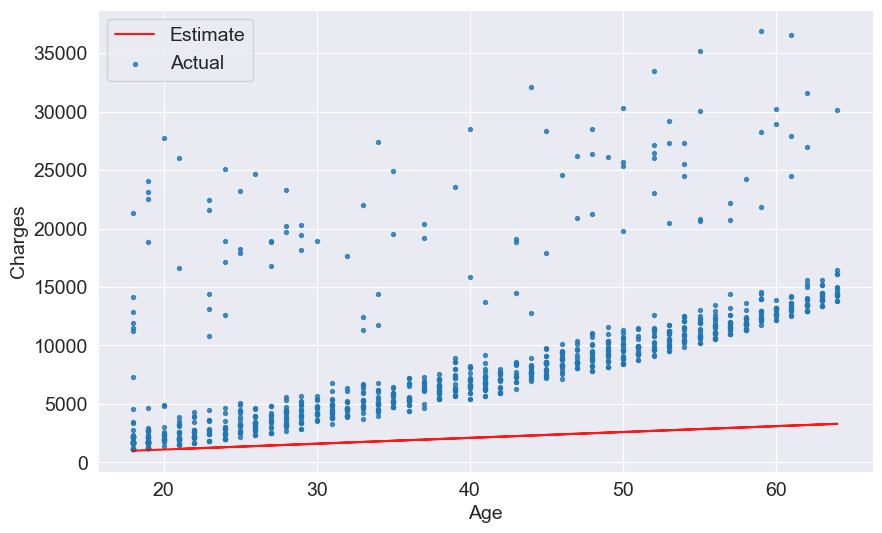

In [38]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s=8, alpha=0.8)

plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual']);

We can see that our estimates are not good and the lie doesnt fit the data.

However we can try different values of w and b to move the line around. 

Lets define a helper funtion try_parameters which takes w and b as inputs and creates the above plot.

In [39]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=0.8, alpha = 0.9)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimated", "Actual"])

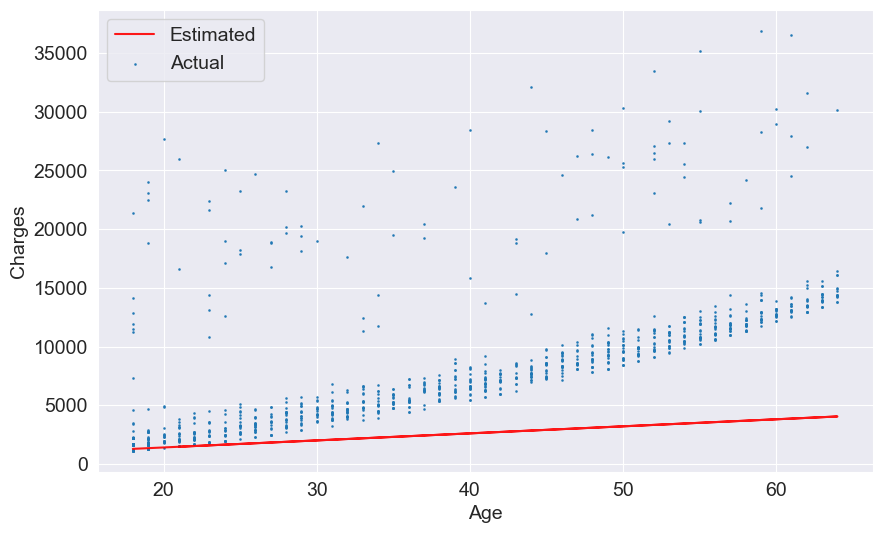

In [40]:
try_parameters(60,200)

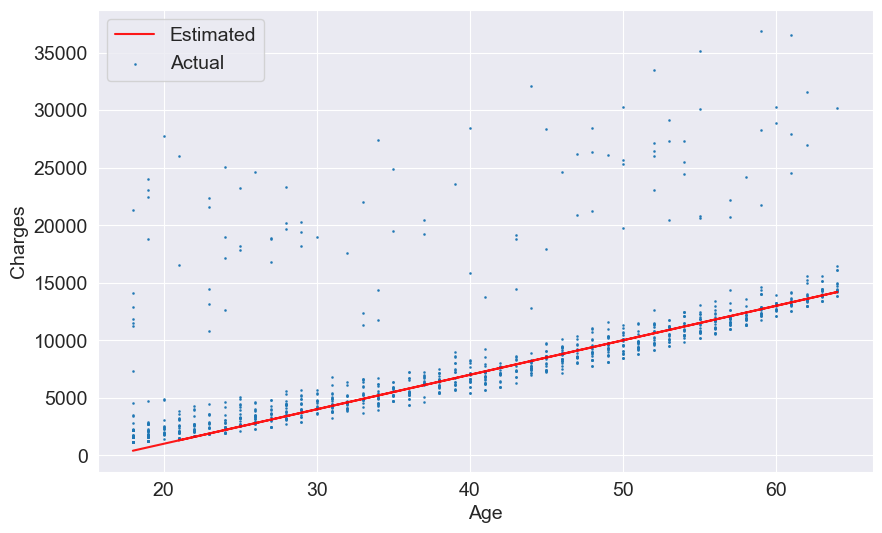

In [41]:
try_parameters(300,-5000)

It would be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.

### Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

In [42]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [43]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [44]:
%pip install numpy --quiet

Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np

In [46]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

Lets compute the RMSE fot our model with a sample set of weights

In [47]:
w=50
b=100

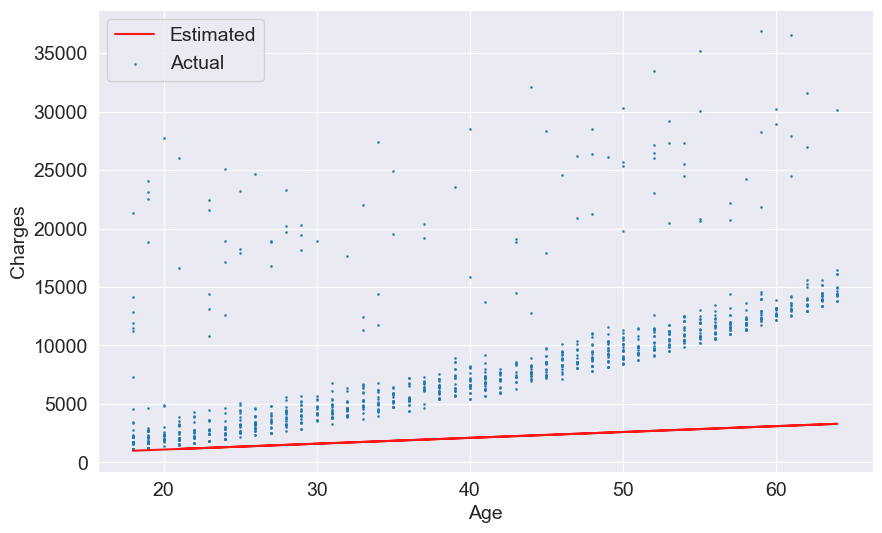

In [48]:
try_parameters(w,b)

In [49]:
targets = non_smoker_df['charges']   
predicted = estimate_charges(non_smoker_df.age, w, b)

In [50]:
rmse(targets, predicted)

8461.949562575493

Here is how we interpret the above number:

On an average, each element in the prediction differs from actual target by $8461.

The result i scalled loss because it indicates how bad the model is at predicting the target vatiables. It represents the information loss model: Lower the loss better the model.

Lets modify the try_parameters function to also display the loss.

In [51]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=0.8, alpha=0.9)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimated", "Actual"])

    loss = rmse(target, predictions)
    print("RMSE Loss:", loss)



RMSE Loss: 4818.589201659388


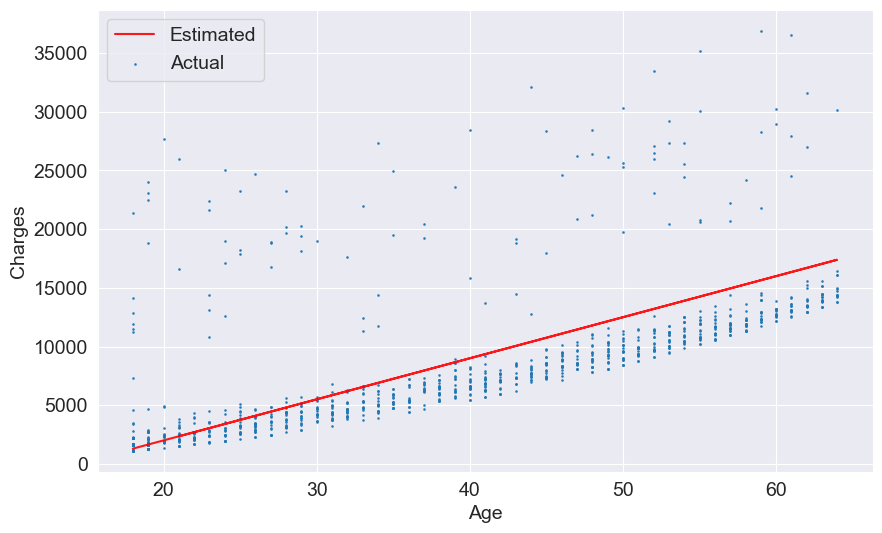

In [52]:
try_parameters(350,-5000)

### Linear Regression Scikit Learn

In [53]:
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


Lets use the "Linear Regression" class from scikit-learn to find the best fit line for "age" vs "charges" using ordinary least squares optimization technique.

In [54]:
from sklearn.linear_model import LinearRegression

First we create a new model object.

In [55]:
model = LinearRegression()

Next we can use "fit" method of the model to find the best fit line for he inputs and targets.

In [56]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [57]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print("input shape", inputs.shape)
print("targets shape", targets.shape)

input shape (1064, 1)
targets shape (1064,)


Lets fit the model to the data

In [58]:
model.fit(inputs, targets)

LinearRegression()

In [59]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/Users/sateeshkashiraju/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [60]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [61]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Lets compute the RMSE loss evaluate the model

In [62]:
rmse(targets, predictions)

4662.505766636395

Seems like our model is off by $4000 on an avg. Which is not too bad considering the fact that there are several outliers.

First RMSE around $8000

Now its around $4000

Parameters of the model are stored in the coef_ and intercept_ properties.

In [63]:
# w
model.coef_

array([267.24891283])

In [64]:
# b
model.intercept_

-2091.420556565021

RMSE Loss: 4662.505766636395


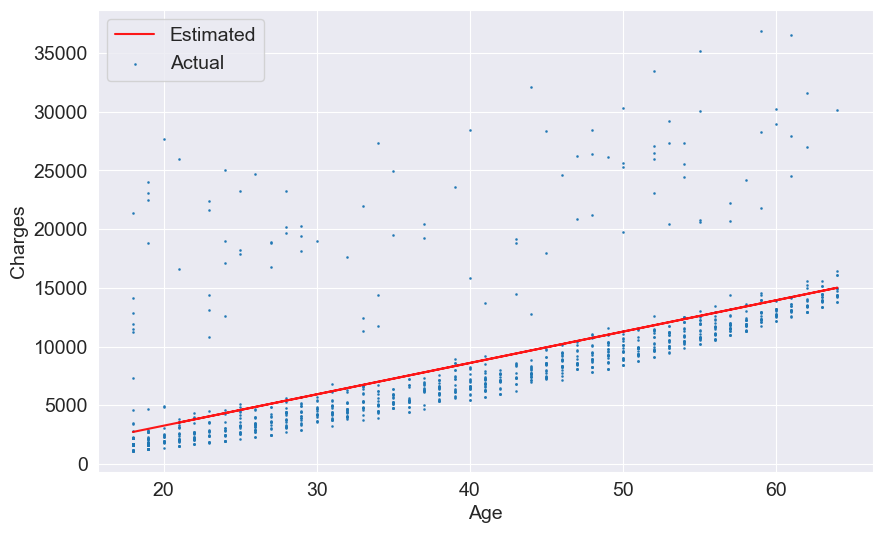

In [65]:
try_parameters(model.coef_, model.intercept_)

  **EXERCISE:** Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the result?

### SGD Regressor

In [66]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(inputs, targets)

SGDRegressor()

In [67]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/Users/sateeshkashiraju/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([3848.22603168, 4818.29903262, 6481.28131994])

In [68]:
predictions = model.predict(inputs)
predictions


array([3501.77138849, 4194.68067487, 4541.13531807, ..., 3501.77138849,
       3501.77138849, 3709.64417441])

In [69]:
rmse(targets, predictions)

6435.16998226667

RMSE Loss: 6435.16998226667


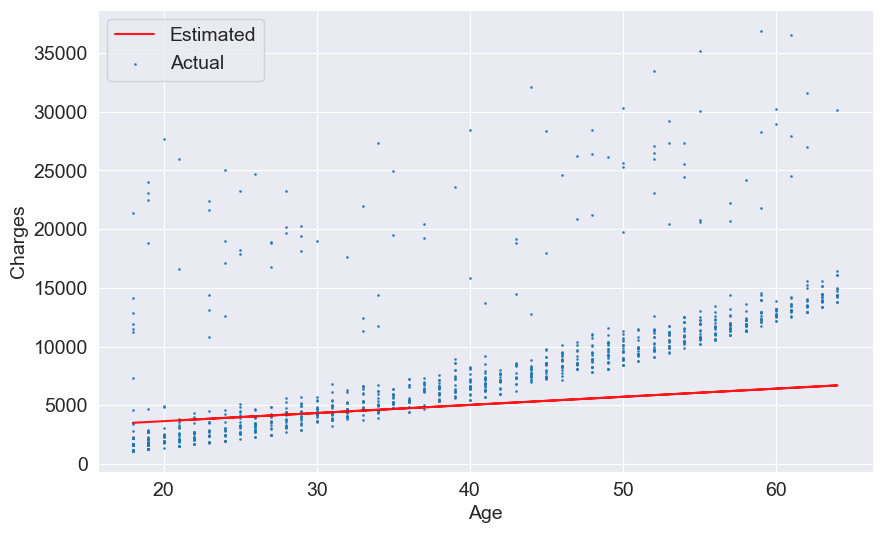

In [70]:
try_parameters(model.coef_, model.intercept_)

In [71]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [72]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As we can see by adding BMI dosent seem to reduce the loss much, as BMI has very week coorelation. Especially for non smokers.

In [73]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [74]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [75]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488036)

In [76]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [77]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children vs Charges')
fig.update_traces(marker_size=4, marker_opacity = 0.5)
fig.show()

In [78]:

inputs , targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(loss)


4608.470405038246


In [79]:
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
inputs

,age,bmi,children
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
5,31,25.740,0
...,...,...,...
1332,52,44.700,3
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0


In [81]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
print(inputs.shape, targets.shape)

# Generate predictions
predictions = model.predict(inputs)
len(predictions)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)


(1338, 3) (1338,)
Loss: 12518.211990859563


In [82]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

### Using Categorical Features for machine learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

### Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

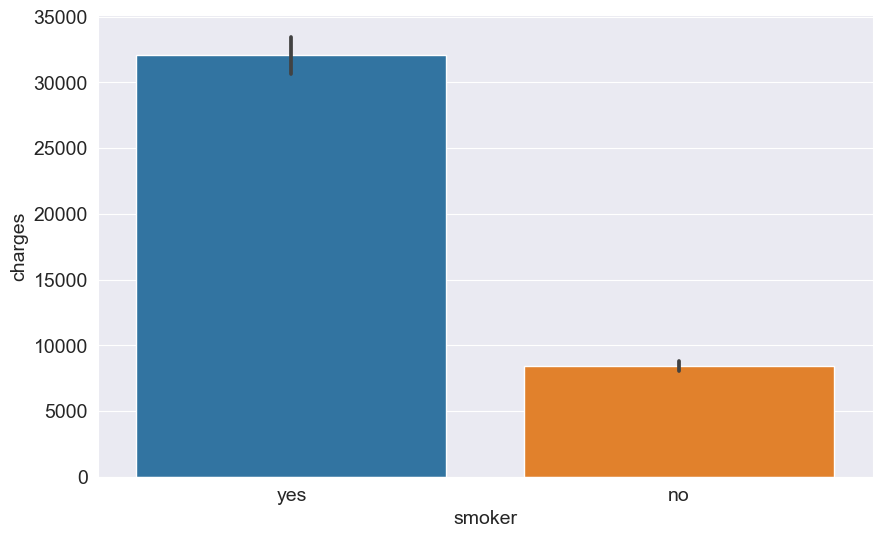

In [83]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [84]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [85]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [86]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_code` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + b$

In [87]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

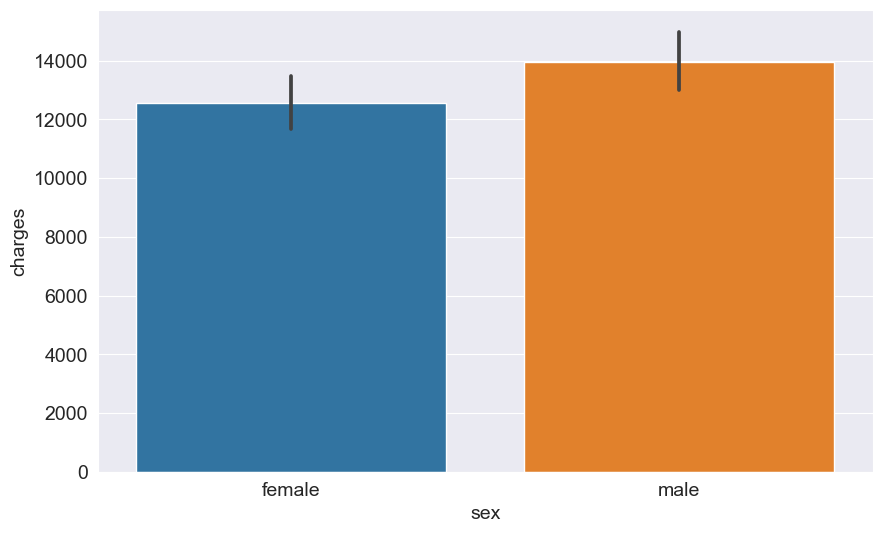

In [88]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [89]:
sex_codes = {'male':1, 'female':0}
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [90]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [91]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202533

In [92]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ', loss)


Loss:  6056.100708754546


As we expected after seeing the correlation, there wont be a significant impact on the loss

#### One Hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

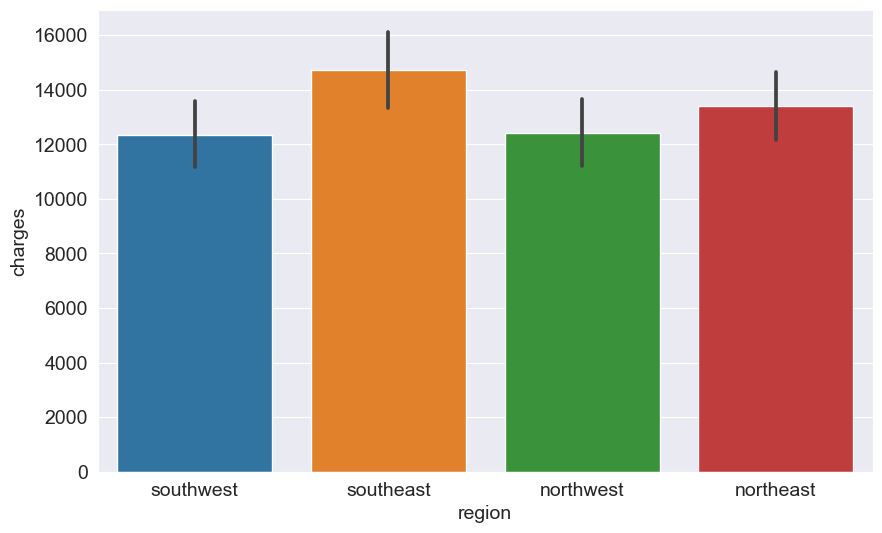

In [93]:
sns.barplot(data=medical_df, x='region', y='charges');

In [94]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [95]:
enc.transform([['northeast'],['northwest']]).toarray()

/Users/sateeshkashiraju/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [96]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [97]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [98]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Lets inclde the region into our model.

In [99]:
#Create input and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate the predictions
predictions = model.predict(inputs)

#Comoute the loss tp eval model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6041.6796511744515


Here the region factor leads to a small reduction in the loss

In [100]:
medical_df[input_cols].loc[4]

age            32.00
bmi            28.88
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       0.00
northwest       1.00
southeast       0.00
southwest       0.00
Name: 4, dtype: float64

In [101]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0.]])

/Users/sateeshkashiraju/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [102]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [103]:
model.intercept_

-12525.547811195473

In [104]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.


We can apply scaling using the StandardScaler class from `scikit-learn`.

In [105]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [108]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [109]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale the data as follows

In [110]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

Now combine these numeric scaled data with categorical data

In [111]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [112]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

#create and train model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute the loss
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 6041.6796511744515


In [113]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


When a new customer comes to us, we need to scale the numerical values and then put them into the model.

In [114]:
new_customer = [[28, 30, 2, 1, 0, 0, 1, 0, 0.]]

In [115]:
scaler.transform([[28, 30, 2]])

/Users/sateeshkashiraju/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [116]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([29875.81463371])

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [119]:
#create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

#generate predictions
predictions_test = model.predict(inputs_test)

#compute the loss
loss = rmse(targets_test, predictions_test)
print("Test Loss: ", loss)

Test Loss:  5795.22469916191


Lets compare it with training loss

In [120]:
#generate predictions
predictions_train = model.predict(inputs_train)

#compute the loss
loss = rmse(targets_train, predictions_train)
print("Training Loss: ", loss)

Training Loss:  6072.662386438596
